# Feedback systems

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE3093: Automatic control, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

## Dynamics

$$
\begin{align*}
\dot{h} &= v \\
m\dot{v} &= -mg + f + d
\end{align*}
$$

* $h$: altitude
* $v$: altitude rate
* $f$: control force
* $d$: distrubance force

We are interested in computing the control force $f$ that sends our vehicle to $h=110$ from $h_0=100$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01            # sampling interval
tf = 10              # final time
n = int(tf/dt)

g = 9.8         # m/s^2
m = 1.         # mass

v0 = 0
h0 = 100

### P control

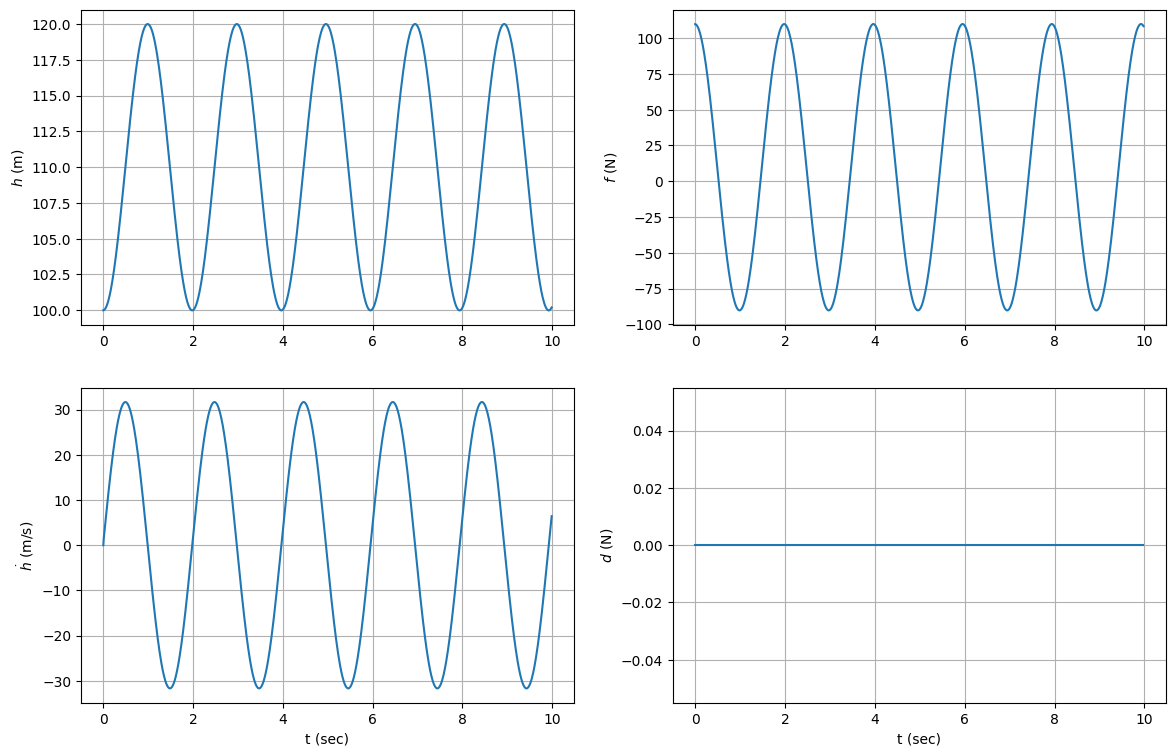

In [2]:
x0 = np.array([h0,v0])
u0 = 0
X = np.zeros((2,n))
U = u0*np.ones(n-1)
D = np.zeros(n-1)
X[:,0] = x0

t = np.arange(0, tf, dt)
D[400:] = 0

Xdot_p = 0
hdot = 0
ei = 0

for k in range(n-1):
    h,v = X[:,k]
    #################################
    # controller
    hc = 110
    e = h - hc
    ei += e
    f = 9.8 -10*e

    #################################
    d = D[k]
    U[k] = f
    hdot = v
    vdot = -g + f/m + d/m
    Xdot = np.array([hdot,vdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot
    if h<=0:
      break

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(221)
plt.plot(t,X[0,:])
plt.ylabel(r'$h$ (m)')
plt.grid()
plt.subplot(223)
plt.plot(t,X[1,:])
plt.xlabel('t (sec)')
plt.ylabel(r'$\dot{h}$ (m/s)')
plt.grid()
plt.subplot(222)
plt.plot(t[:-1],U)
plt.ylabel(r'$f$ (N)')
plt.grid()
plt.subplot(224)
plt.plot(t[:-1],D)
plt.xlabel('t (sec)')
plt.ylabel(r'$d$ (N)')
plt.grid()
plt.show()

### PD control

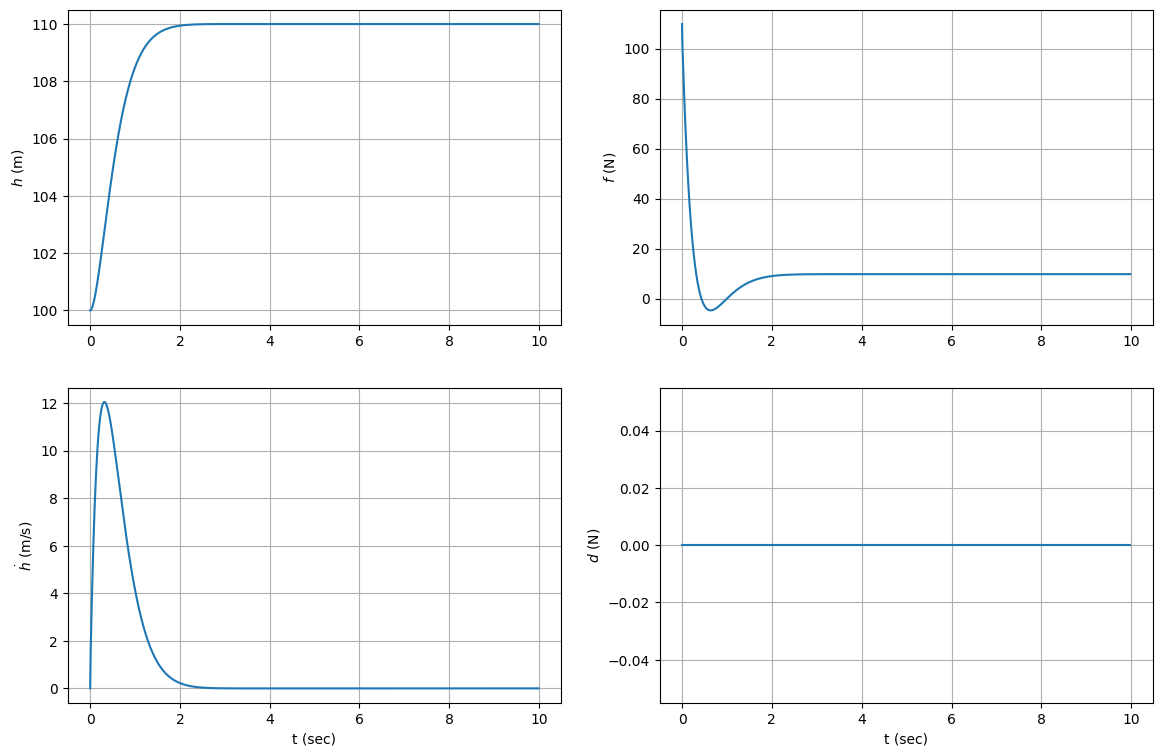

In [3]:
x0 = np.array([h0,v0])
u0 = 0
X = np.zeros((2,n))
U = u0*np.ones(n-1)
D = np.zeros(n-1)
X[:,0] = x0

t = np.arange(0, tf, dt)
D[400:] = 0

Xdot_p = 0
hdot = 0
ei = 0

for k in range(n-1):
    h,v = X[:,k]
    #################################
    # controller
    hc = 110
    e = h - hc
    ei += e
    f = 9.8 -10*e -6*v
    #################################
    d = D[k]
    U[k] = f
    hdot = v
    vdot = -g + f/m + d/m
    Xdot = np.array([hdot,vdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot
    if h<=0:
      break

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(221)
plt.plot(t,X[0,:])
plt.ylabel(r'$h$ (m)')
plt.grid()
plt.subplot(223)
plt.plot(t,X[1,:])
plt.xlabel('t (sec)')
plt.ylabel(r'$\dot{h}$ (m/s)')
plt.grid()
plt.subplot(222)
plt.plot(t[:-1],U)
plt.ylabel(r'$f$ (N)')
plt.grid()
plt.subplot(224)
plt.plot(t[:-1],D)
plt.xlabel('t (sec)')
plt.ylabel(r'$d$ (N)')
plt.grid()
plt.show()

### PD control under step disturbance

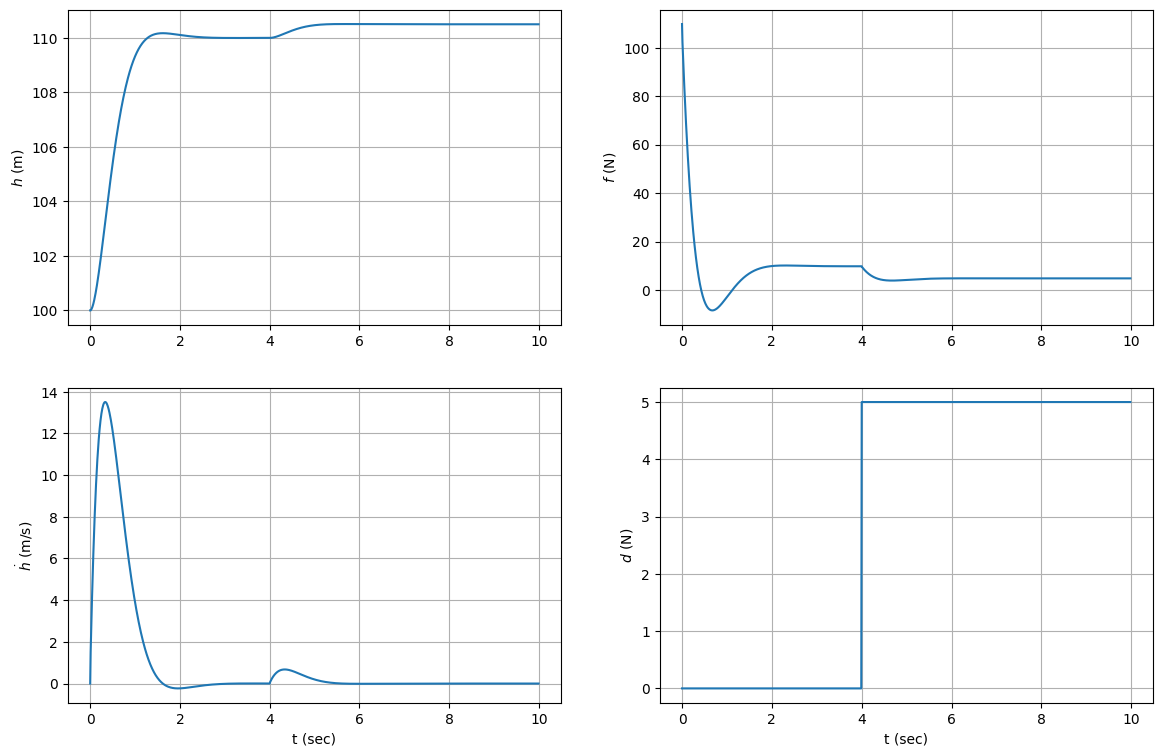

In [4]:
x0 = np.array([h0,v0])
u0 = 0
X = np.zeros((2,n))
U = u0*np.ones(n-1)
D = np.zeros(n-1)
X[:,0] = x0

t = np.arange(0, tf, dt)
D[400:] = 5

Xdot_p = 0
hdot = 0
ei = 0

for k in range(n-1):
    h,v = X[:,k]
    #################################
    # controller
    hc = 110
    e = h - hc
    ei += e
    f = 9.8 -10*e -5*v
    #################################
    d = D[k]
    U[k] = f
    hdot = v
    vdot = -g + f/m + d/m
    Xdot = np.array([hdot,vdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot
    if h<=0:
      break

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(221)
plt.plot(t,X[0,:])
plt.ylabel(r'$h$ (m)')
plt.grid()
plt.subplot(223)
plt.plot(t,X[1,:])
plt.xlabel('t (sec)')
plt.ylabel(r'$\dot{h}$ (m/s)')
plt.grid()
plt.subplot(222)
plt.plot(t[:-1],U)
plt.ylabel(r'$f$ (N)')
plt.grid()
plt.subplot(224)
plt.plot(t[:-1],D)
plt.xlabel('t (sec)')
plt.ylabel(r'$d$ (N)')
plt.grid()
plt.show()

### PID control under step disturbance

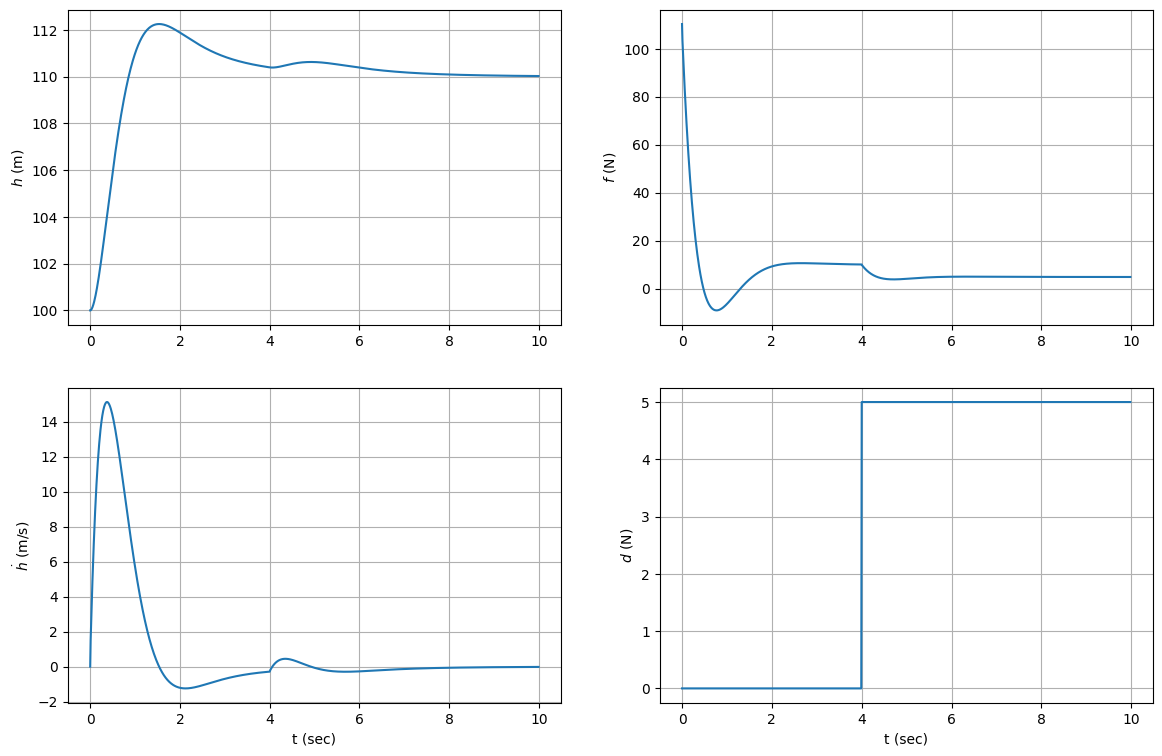

In [5]:
x0 = np.array([h0,v0])
u0 = 0
X = np.zeros((2,n))
U = u0*np.ones(n-1)
D = np.zeros(n-1)
X[:,0] = x0

t = np.arange(0, tf, dt)
D[400:] = 5

Xdot_p = 0
hdot = 0
ei = 0

for k in range(n-1):
    h,v = X[:,k]
    #################################
    # controller
    hc = 110
    e = h - hc
    ei += e
    f = 9.8 -10*e -5*v -0.05*ei
    #################################
    d = D[k]
    U[k] = f
    hdot = v
    vdot = -g + f/m + d/m
    Xdot = np.array([hdot,vdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot
    if h<=0:
      break

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(221)
plt.plot(t,X[0,:])
plt.ylabel(r'$h$ (m)')
plt.grid()
plt.subplot(223)
plt.plot(t,X[1,:])
plt.xlabel('t (sec)')
plt.ylabel(r'$\dot{h}$ (m/s)')
plt.grid()
plt.subplot(222)
plt.plot(t[:-1],U)
plt.ylabel(r'$f$ (N)')
plt.grid()
plt.subplot(224)
plt.plot(t[:-1],D)
plt.xlabel('t (sec)')
plt.ylabel(r'$d$ (N)')
plt.grid()
plt.show()

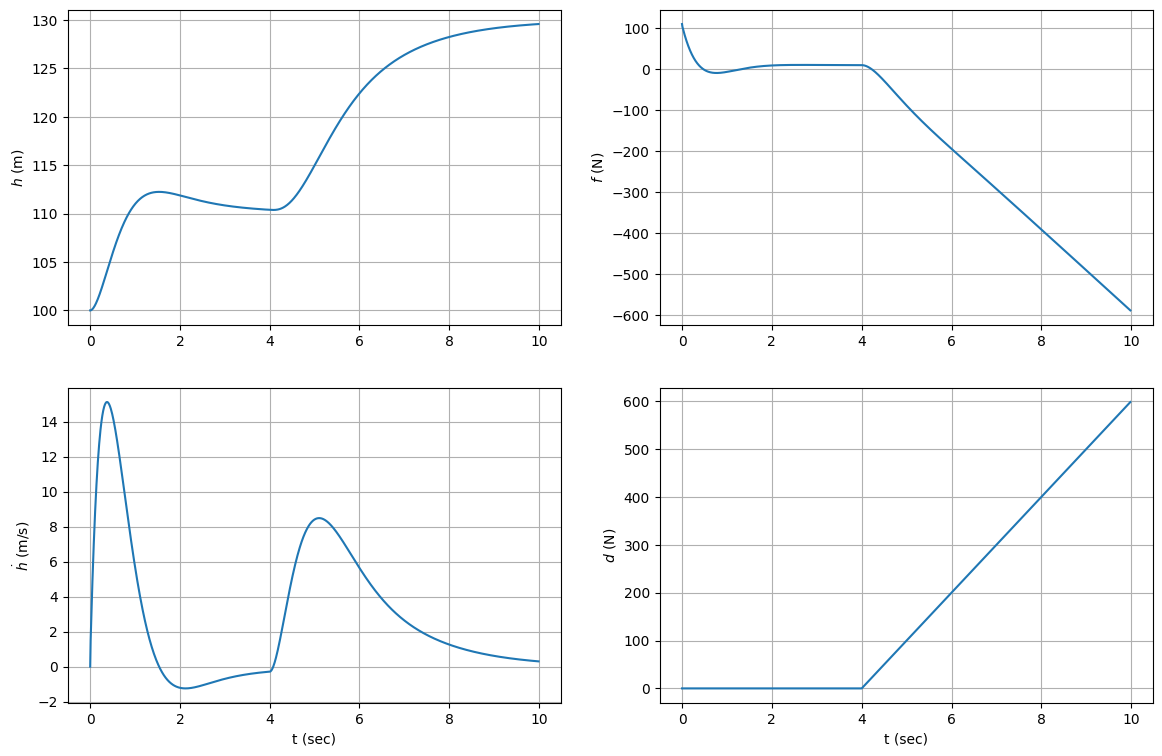

: 

In [ ]:
x0 = np.array([h0,v0])
u0 = 0
X = np.zeros((2,n))
U = u0*np.ones(n-1)
D = np.zeros(n-1)
X[:,0] = x0

t = np.arange(0, tf, dt)
for i in range(1, len(D)-400):
   D[400+i:] = i

Xdot_p = 0
hdot = 0
ei = 0

for k in range(n-1):
    h,v = X[:,k]
    #################################
    # controller
    hc = 110
    e = h - hc
    ei += e
    f = 9.8 -10*e -5*v -0.05*ei
    #################################
    d = D[k]
    U[k] = f
    hdot = v
    vdot = -g + f/m + d/m
    Xdot = np.array([hdot,vdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot
    if h<=0:
      break

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(221)
plt.plot(t,X[0,:])
plt.ylabel(r'$h$ (m)')
plt.grid()
plt.subplot(223)
plt.plot(t,X[1,:])
plt.xlabel('t (sec)')
plt.ylabel(r'$\dot{h}$ (m/s)')
plt.grid()
plt.subplot(222)
plt.plot(t[:-1],U)
plt.ylabel(r'$f$ (N)')
plt.grid()
plt.subplot(224)
plt.plot(t[:-1],D)
plt.xlabel('t (sec)')
plt.ylabel(r'$d$ (N)')
plt.grid()
plt.show()